**Task 2 - Implementing LSTM for Time-Series Forecasting**


***Read the following descriptions and instructions***

Time-series forecasting is a crucial task in various fields, including finance, economics, and weather prediction. In this question, you'll work with Long Short-Term Memory (LSTM) networks, a type of recurrent neural network (RNN) that is particularly effective at learning from sequences of data. LSTMs are designed to capture long-term dependencies in time-series data, making them well-suited for predicting future values based on historical patterns.

In this task, you will implement an LSTM model to forecast stock prices using historical data. Specifically, you'll use the closing prices of a stock to predict future prices, which is a common real-world application of time-series analysis in financial markets. This exercise will help you understand the principles of sequence modeling and how LSTMs can be applied to complex prediction tasks.

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# 1. Load and Preprocess the Data
def load_data(file_path):
    df = pd.read_csv(file_path)
    return df['Close'].values  # Use the 'Close' price for prediction

In [4]:
# 2. Prepare the Dataset for LSTM
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step)])
        y.append(data[i + time_step])
    return np.array(X), np.array(y)

In [5]:
# Load Data
file_path = '/content/drive/MyDrive/Lab_5/GOOG.csv'  # Path to the dataset in Colab or Jupyter home directory
data = load_data(file_path)

In [6]:
# Normalize the Data
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data.reshape(-1, 1)).reshape(-1)

**time_step = 60:** This variable defines the length of the input sequence, meaning we will use the past 60 days of stock prices to predict the next day's closing price. This value is chosen to capture enough historical information to make an accurate prediction. You can change and try

In [7]:

# Create the Dataset
time_step = 60  # Using 60 days of data to predict the next day's price
X, y = create_dataset(data, time_step)

In [8]:
# Reshape for LSTM input [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

In [9]:
# Split the Data into Training and Testing Sets (80% train, 20% test)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

***Modify the number of units in the LSTM layers and consider adding more layers or changing the dropout rate to see how these adjustments affect the model's performance***

Experiment with 'units'

Experiment with dropout for regularization

Add another LSTM layer



## Baseline

In [10]:
# 3. Define the LSTM Model
model = Sequential()

# --- Students: Modify the number of LSTM layers and units to experiment with model complexity ---
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))  # <-- Experiment with 'units'
model.add(Dropout(0.2))  # Experiment with dropout for regularization

model.add(LSTM(units=50, return_sequences=False))  # <-- Add another LSTM layer
model.add(Dropout(0.2))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_absolute_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


***Adjust the epochs and batch_size during the training phase to optimize the model’s learning process and its ability to generalize.***

In [11]:
# 4. Train the Model

model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)  # <-- Experiment with 'epochs' and 'batch_size'

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - loss: 0.4729
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.1709
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.1267
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.1164
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.1056
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - loss: 0.1119
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step - loss: 0.1053
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - loss: 0.1056
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - loss: 0.0965
Epoch 10/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - loss: 0.0984
Epoch 11/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - loss: 0.0988
Epoch 12/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - loss: 0.0950
Epoch 13/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.0996
Epoch 14/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0982
Epoch 15/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.1000
Epoch 16/20
5/5 ━━━━━━━━━━━━━━

## Hidden units

In [12]:
model_hidden_units = Sequential()

# --- Students: Modify the number of LSTM layers and units to experiment with model complexity ---
model_hidden_units.add(LSTM(units=100, return_sequences=True, input_shape=(time_step, 1)))  # <-- Experiment with 'units'
model_hidden_units.add(Dropout(0.2))  # Experiment with dropout for regularization

model_hidden_units.add(LSTM(units=100, return_sequences=False))  # <-- Add another LSTM layer
model_hidden_units.add(Dropout(0.2))

model_hidden_units.add(Dense(1))

model_hidden_units.compile(optimizer='adam', loss='mean_absolute_error')

In [13]:
model_hidden_units.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)  # <-- Experiment with 'epochs' and 'batch_size'

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - loss: 0.4131
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 0.1731
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 0.1367
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 0.1067
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 0.1027
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 0.1006
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 0.0965
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - loss: 0.0941
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 134ms/step - loss: 0.0959
Epoch 10/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step - loss: 0.0887
Epoch 11/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 132ms/step - loss: 0.0834
Epoch 12/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step - loss: 0.0909
Epoch 13/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 0.0945
Epoch 14/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 0.0899
Epoch 15/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 0.0847
Epoch 16/20
5/5 ━━━━━━━━━━━━━

## Additional Layers

In [14]:
model_hidden_layers = Sequential()

# --- Students: Modify the number of LSTM layers and units to experiment with model complexity ---
model_hidden_layers.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))  # <-- Experiment with 'units'
model_hidden_layers.add(Dropout(0.2))  # Experiment with dropout for regularization

model_hidden_layers.add(LSTM(units=50, return_sequences=True))  # <-- Add another LSTM layer
model_hidden_layers.add(Dropout(0.2))

model_hidden_layers.add(LSTM(units=50, return_sequences=False))  # <-- Add another LSTM layer
model_hidden_layers.add(Dropout(0.2))

model_hidden_layers.add(Dense(1))

model_hidden_layers.compile(optimizer='adam', loss='mean_absolute_error')

In [15]:
model_hidden_layers.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)  # <-- Experiment with 'epochs' and 'batch_size'

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - loss: 0.4584
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 0.1627
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step - loss: 0.1315
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - loss: 0.1290
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step - loss: 0.1169
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 0.1025
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 0.1081
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 0.1055
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 0.1093
Epoch 10/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 0.1197
Epoch 11/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - loss: 0.1257
Epoch 12/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 0.1045
Epoch 13/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 0.1046
Epoch 14/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 0.1073
Epoch 15/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 0.1010
Epoch 16/20
5/5 ━━━━━━━━━━━━━━━

## Batch Size

In [16]:
model_batch_size = Sequential()

# --- Students: Modify the number of LSTM layers and units to experiment with model complexity ---
model_batch_size.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))  # <-- Experiment with 'units'
model_batch_size.add(Dropout(0.2))  # Experiment with dropout for regularization

model_batch_size.add(LSTM(units=50, return_sequences=False))  # <-- Add another LSTM layer
model_batch_size.add(Dropout(0.2))

model_batch_size.add(Dense(1))

model_batch_size.compile(optimizer='adam', loss='mean_absolute_error')

In [17]:
model_batch_size.fit(X_train, y_train, epochs=20, batch_size=100, verbose=1)  # <-- Experiment with 'epochs' and 'batch_size'

Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms/step - loss: 0.5637
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - loss: 0.4200
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 0.2699
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - loss: 0.1307
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - loss: 0.1515
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 0.1642
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.1181
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.1158
Epoch 9/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.1258
Epoch 10/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.1262
Epoch 11/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.1242
Epoch 12/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 0.1101
Epoch 13/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.1048
Epoch 14/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.1160
Epoch 15/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.1112
Epoch 16/20
2/2 ━━━━━━━━━━━━━

Epoch

In [18]:
model_epoch = Sequential()

# --- Students: Modify the number of LSTM layers and units to experiment with model complexity ---
model_epoch.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))  # <-- Experiment with 'units'
model_epoch.add(Dropout(0.2))  # Experiment with dropout for regularization

model_epoch.add(LSTM(units=50, return_sequences=False))  # <-- Add another LSTM layer
model_epoch.add(Dropout(0.2))

model_epoch.add(Dense(1))

model_epoch.compile(optimizer='adam', loss='mean_absolute_error')

In [19]:
model_epoch.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)  # <-- Experiment with 'epochs' and 'batch_size'

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.5140
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.1604
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.1505
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.1320
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.1277
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.1110
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.1048
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.1120
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.1088
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0960
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.1048
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 0.0899
Epoch 13/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - loss: 0.0999
Epoch 14/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 0.0934
Epoch 15/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 0.0872
Epoch 16/50
5/5 ━━━━━━━━━━━━━━━━━━

## Predictions

In [20]:
# 5. Predict on the Test Data
y_pred = model.predict(X_test)
y_pred_hidden_units = model_hidden_units.predict(X_test)
y_pred_hidden_layers = model_hidden_layers.predict(X_test)
y_pred_batch_size = model_batch_size.predict(X_test)
y_pred_epoch = model_epoch.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 423ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 453ms/step


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 500ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 417ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 280ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 292ms/step


In [21]:
# Inverse transform to get the original scale
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1)).reshape(-1)
y_pred_hidden_units = scaler.inverse_transform(y_pred_hidden_units.reshape(-1, 1)).reshape(-1)
y_pred_hidden_layers = scaler.inverse_transform(y_pred_hidden_layers.reshape(-1, 1)).reshape(-1)
y_pred_batch_size = scaler.inverse_transform(y_pred_batch_size.reshape(-1, 1)).reshape(-1)
y_pred_epoch = scaler.inverse_transform(y_pred_epoch.reshape(-1, 1)).reshape(-1)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).reshape(-1)

***Analyze the plot to evaluate the model performance. Consider modifying the model architecture or training parameters to improve accuracy***

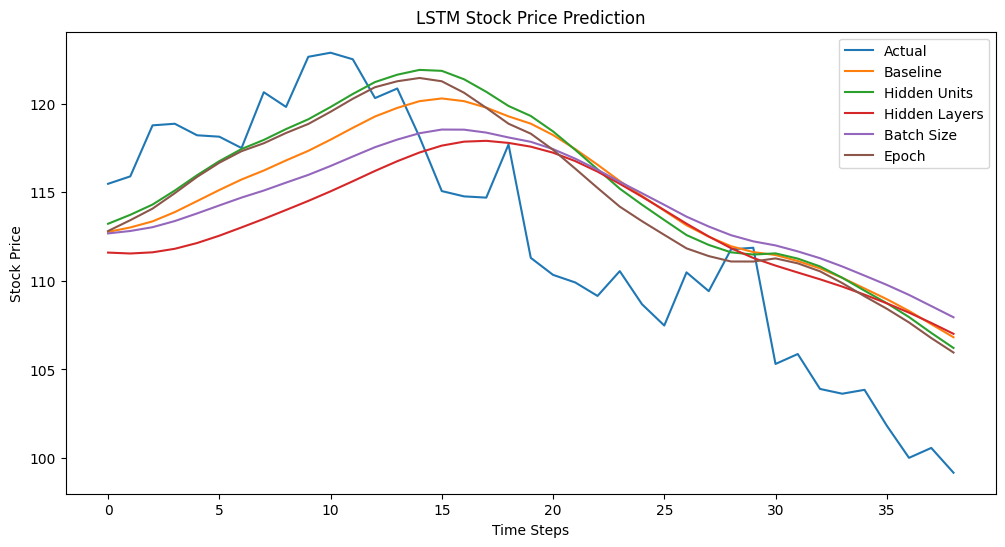

In [22]:
# 6. Plot the Results
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Baseline')
plt.plot(y_pred_hidden_units, label='Hidden Units')
plt.plot(y_pred_hidden_layers, label='Hidden Layers')
plt.plot(y_pred_batch_size, label='Batch Size')
plt.plot(y_pred_epoch, label='Epoch')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.title('LSTM Stock Price Prediction')
plt.legend()
plt.show()



***Answer the following questions. (You can type answers in a text cell)***
1.	What is the purpose of normalizing the 'Close' prices before feeding them into the LSTM model?
* Normalised input can improve model convergence. This is important for gradient descent to reach an optimal solution in lesser time
<br /><br />
2.	What is the purpose of the Dropout layer in the LSTM model?
* It is regularization technique that prevents the model from overfitting
<br /><br />
3.	In the plot showing actual vs predicted stock prices, what does it indicate if the predicted line closely follows the actual line?
* The model trained fits the actual data thus can deduce it is a good model
